## Q.1) Load the dataset into a pandas dataframe. Name the variable as “survey”.

In [601]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [602]:
survey = pd.read_excel('Sample Survey.xlsx', sheet_name = None)     # ANSWER

In [603]:
survey.items()

dict_items([('Description',               Column                                        Description
0        response_id            Unique id for each sample (respondent).
1    collection_date            Date on which the sample was collected.
2        urban_rural  Whether the respodent belongs to a rural or ur...
3          education      The education qualitfication of the repondent
4             income                          Income of the respondent.
5           Vote_Now  If elections are held today, which party will ...
6          Past_Vote  Which party did the respondent vote for in the...
7    CM_satisfaction  How satisfied is the respondent with the perfo...
8   MLA_satisfaction  How satisfied is the respondent with the perfo...
9                age                         The age of the respondent.
10            gender                      The gender of the respondent.
11       assembly_no  The assembly constituency number of the respon...
12          category                

In [604]:
# Sheets available in the excel file

survey.keys()

dict_keys(['Description', 'Data'])

## Q.2) How many samples were collected on each day?

In [605]:
x = survey['Data']
x

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6863,6864,2020-09-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780
6864,6865,2020-09-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926
6865,6866,2020-09-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137


In [606]:
# total count of Unique id for each sample:

x['response_id'].count()

6867

In [607]:
# total number of days/unique dates:  

y = x['collection_date'].unique()
print(y)
y.shape

['2020-08-24T00:00:00.000000000' '2020-08-25T00:00:00.000000000'
 '2020-08-26T00:00:00.000000000' '2020-08-27T00:00:00.000000000'
 '2020-08-28T00:00:00.000000000' '2020-08-29T00:00:00.000000000'
 '2020-08-30T00:00:00.000000000' '2020-08-31T00:00:00.000000000'
 '2020-09-01T00:00:00.000000000']


(9,)

In [608]:
# finding how much samples were collected on each day by resampling the dataset date-wise and taking count of samples

z1 = x.resample('D', on='collection_date').response_id.count()
z1   

collection_date
2020-08-24    1479
2020-08-25     998
2020-08-26     598
2020-08-27     665
2020-08-28     761
2020-08-29     620
2020-08-30     582
2020-08-31     557
2020-09-01     607
Freq: D, Name: response_id, dtype: int64

In [609]:
# Converting the series into a single column dataframe

Z_1 = pd.DataFrame([z1]).transpose()
Z_1        #  ANSWER

,response_id
collection_date,
2020-08-24,1479
2020-08-25,998
2020-08-26,598
2020-08-27,665
2020-08-28,761
2020-08-29,620
2020-08-30,582
2020-08-31,557
2020-09-01,607


##  Q.3) What proportion of the total respondents were aged less than 45?

In [610]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   object        
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

In [611]:
# converting 'age' column datatype from object to float and if datatype is not object or int or float, then it is NaN

x['age'] = pd.to_numeric(x.age, errors='coerce')
x.dtypes

response_id                  int64
collection_date     datetime64[ns]
urban_rural                 object
education                   object
income                      object
Vote_Now                    object
Past_Vote                   object
CM_satisfaction             object
MLA_satisfaction            object
age                        float64
gender                      object
assembly_no                  int64
category                    object
weight                     float64
dtype: object

In [612]:
# rows in 'age' column, that were having non-numeric data in 'age' column

x[pd.to_numeric(x.age, errors='coerce').isnull()]

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
123,124,2020-08-24,Rural,Post - Graduation,"BPL/Below ₹ 5,000",JD(U),Others,Fully Satisfied,Somewhat Dissatisfied,NaN,Male,180,Gen,2.092567


In [613]:
# Details of repondents whose age < 45

z2 = x[x['age'] < 45]
z2

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26.0,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34.0,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25.0,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36.0,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22.0,Male,176,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25.0,Male,166,Gen,0.036329
6863,6864,2020-09-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30.0,Male,169,BC,0.252780
6864,6865,2020-09-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20.0,Male,241,Gen,1.812926
6865,6866,2020-09-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23.0,Male,243,Gen,0.080137


In [614]:
z2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6398 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6398 non-null   int64         
 1   collection_date   6398 non-null   datetime64[ns]
 2   urban_rural       6398 non-null   object        
 3   education         6398 non-null   object        
 4   income            6398 non-null   object        
 5   Vote_Now          6398 non-null   object        
 6   Past_Vote         6398 non-null   object        
 7   CM_satisfaction   6398 non-null   object        
 8   MLA_satisfaction  6398 non-null   object        
 9   age               6398 non-null   float64       
 10  gender            6398 non-null   object        
 11  assembly_no       6398 non-null   int64         
 12  category          6398 non-null   object        
 13  weight            6398 non-null   float64       
dtypes: datetime64[ns](1), fl

In [615]:
len (z2['response_id'])  

6398

In [616]:
len (x['response_id'])

6867

In [617]:
# Hence, proportion of the total respondents that were aged less than 45 is: 

z3 = len (z2['response_id']) / len (x['response_id'])
z3

0.9317023445463812

In [618]:
percentage = "{:.2%}".format(z3)
print(percentage)

93.17%


## Q.4) Create a new column in the dataframe “age_group”. This column should contain the age group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. The dataframe should look like this after the column creation:

In [619]:
# assigning age ranges (age groups) to the data and adding the new column with age_group

x_copy = x.copy()
bins= [18,25,40,55,99]
labels = ['18-25','25-40','40-55','55+']
x_copy['age_group'] = pd.cut(x_copy['age'], bins=bins, labels=labels, right=False)
x_copy

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26.0,Male,211,Gen,0.346969,25-40
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34.0,Male,189,BC,0.603419,25-40
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25.0,Male,191,Gen,0.673762,25-40
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36.0,Male,194,Gen,1.101298,25-40
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22.0,Male,176,BC,0.333505,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25.0,Male,166,Gen,0.036329,25-40
6863,6864,2020-09-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30.0,Male,169,BC,0.252780,25-40
6864,6865,2020-09-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20.0,Male,241,Gen,1.812926,18-25
6865,6866,2020-09-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23.0,Male,243,Gen,0.080137,18-25


In [620]:
z4 = x_copy[['response_id','age','age_group']]
z4

,response_id,age,age_group
0,1,26.0,25-40
1,2,34.0,25-40
2,3,25.0,25-40
3,4,36.0,25-40
4,5,22.0,18-25
...,...,...,...
6862,6863,25.0,25-40
6863,6864,30.0,25-40
6864,6865,20.0,18-25
6865,6866,23.0,18-25


##  Q.5)  How many samples were collected for each age-group? Which age-group had the most samples?

In [621]:
# Samples collected from 18-25 were found to be equal to 2093

z4[z4['age_group'] == '18-25'].count()

response_id    2093
age            2093
age_group      2093
dtype: int64

In [622]:
# Samples collected from 25-40 were found to be equal to 3844

z4[z4['age_group'] == '25-40'].count()    # most samples were collected from this age group 25-40

response_id    3844
age            3844
age_group      3844
dtype: int64

In [623]:
# Samples collected from 40-55 were found to be equal to 801

z4[z4['age_group'] == '40-55'].count()

response_id    801
age            801
age_group      801
dtype: int64

In [624]:
# Samples collected from 40-55 were found to be equal to 127

z4[z4['age_group'] == '55+'].count()

response_id    127
age            127
age_group      127
dtype: int64

## Q.6) What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?

In [625]:
z5 = x_copy[['response_id','Vote_Now','Past_Vote']]
z5

,response_id,Vote_Now,Past_Vote
0,1,BJP,BJP
1,2,RLSP,JD(U)
2,3,JAP(L),BJP
3,4,RJD,RJD
4,5,JD(U),Did not vote
...,...,...,...
6862,6863,JD(U),BJP
6863,6864,RJD,RJD
6864,6865,JAP(L),RJD
6865,6866,BJP,Did not vote


In [626]:
z6 = z5[z5['Vote_Now']=='RJD']

In [627]:
z6[z6['Past_Vote']=='RJD']

,response_id,Vote_Now,Past_Vote
3,4,RJD,RJD
9,10,RJD,RJD
16,17,RJD,RJD
19,20,RJD,RJD
21,22,RJD,RJD
...,...,...,...
6846,6847,RJD,RJD
6848,6849,RJD,RJD
6858,6859,RJD,RJD
6860,6861,RJD,RJD


## Q.7) For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.

In [628]:
x_copy

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26.0,Male,211,Gen,0.346969,25-40
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34.0,Male,189,BC,0.603419,25-40
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25.0,Male,191,Gen,0.673762,25-40
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36.0,Male,194,Gen,1.101298,25-40
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22.0,Male,176,BC,0.333505,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25.0,Male,166,Gen,0.036329,25-40
6863,6864,2020-09-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30.0,Male,169,BC,0.252780,25-40
6864,6865,2020-09-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20.0,Male,241,Gen,1.812926,18-25
6865,6866,2020-09-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23.0,Male,243,Gen,0.080137,18-25


In [629]:
x_copy1 = x_copy[['response_id', 'collection_date','CM_satisfaction']]
x_copy1

,response_id,collection_date,CM_satisfaction
0,1,2020-08-24,Fully Dissatisfied
1,2,2020-08-24,Somewhat Satisfied
2,3,2020-08-24,Fully Dissatisfied
3,4,2020-08-24,Fully Dissatisfied
4,5,2020-08-24,Fully Satisfied
...,...,...,...
6862,6863,2020-09-01,Fully Satisfied
6863,6864,2020-09-01,Fully Dissatisfied
6864,6865,2020-09-01,Can’t say
6865,6866,2020-09-01,Fully Satisfied


In [630]:
x_copy1['CM_satisfaction'].unique()
fully_satisfied = x_copy1[x_copy1['CM_satisfaction'] == 'Fully Satisfied']
fully_satisfied

,response_id,collection_date,CM_satisfaction
4,5,2020-08-24,Fully Satisfied
8,9,2020-08-24,Fully Satisfied
14,15,2020-08-24,Fully Satisfied
17,18,2020-08-24,Fully Satisfied
28,29,2020-08-24,Fully Satisfied
...,...,...,...
6851,6852,2020-09-01,Fully Satisfied
6852,6853,2020-09-01,Fully Satisfied
6862,6863,2020-09-01,Fully Satisfied
6865,6866,2020-09-01,Fully Satisfied


In [631]:
per_day_count_CM_Satisfied = fully_satisfied.resample('D', on='collection_date').response_id.count()
per_day_count_CM_Satisfied

collection_date
2020-08-24    146
2020-08-25     95
2020-08-26     59
2020-08-27     54
2020-08-28     92
2020-08-29     73
2020-08-30     65
2020-08-31     62
2020-09-01     75
Freq: D, Name: response_id, dtype: int64

In [632]:
z1

collection_date
2020-08-24    1479
2020-08-25     998
2020-08-26     598
2020-08-27     665
2020-08-28     761
2020-08-29     620
2020-08-30     582
2020-08-31     557
2020-09-01     607
Freq: D, Name: response_id, dtype: int64

In [633]:
# Hence, the proportion of respondents who were fully satisfied with the performance of the CM :
z7 = per_day_count_CM_Satisfied/z1
z7

collection_date
2020-08-24    0.098715
2020-08-25    0.095190
2020-08-26    0.098662
2020-08-27    0.081203
2020-08-28    0.120894
2020-08-29    0.117742
2020-08-30    0.111684
2020-08-31    0.111311
2020-09-01    0.123558
Freq: D, Name: response_id, dtype: float64

##  Q.8) In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.

In [634]:
x_copy2 = x_copy[['response_id', 'collection_date','MLA_satisfaction']]
x_copy2

,response_id,collection_date,MLA_satisfaction
0,1,2020-08-24,Fully Dissatisfied
1,2,2020-08-24,Fully Dissatisfied
2,3,2020-08-24,Somewhat Satisfied
3,4,2020-08-24,Somewhat Satisfied
4,5,2020-08-24,Fully Satisfied
...,...,...,...
6862,6863,2020-09-01,Fully Dissatisfied
6863,6864,2020-09-01,Fully Dissatisfied
6864,6865,2020-09-01,Fully Dissatisfied
6865,6866,2020-09-01,Somewhat Satisfied


In [635]:
x_copy2['MLA_satisfaction'].unique()

array(['Fully Dissatisfied', 'Somewhat Satisfied', 'Fully Satisfied',
       'Somewhat Dissatisfied', 'Can’t say'], dtype=object)

In [636]:
fully_dissatisfied = x_copy2[x_copy2['MLA_satisfaction'] == 'Fully Dissatisfied']
fully_dissatisfied

,response_id,collection_date,MLA_satisfaction
0,1,2020-08-24,Fully Dissatisfied
1,2,2020-08-24,Fully Dissatisfied
5,6,2020-08-24,Fully Dissatisfied
6,7,2020-08-24,Fully Dissatisfied
8,9,2020-08-24,Fully Dissatisfied
...,...,...,...
6855,6856,2020-09-01,Fully Dissatisfied
6857,6858,2020-09-01,Fully Dissatisfied
6862,6863,2020-09-01,Fully Dissatisfied
6863,6864,2020-09-01,Fully Dissatisfied


In [637]:
per_day_count_MLA_dissatisfied = fully_dissatisfied.resample('D', on='collection_date').response_id.count()
per_day_count_MLA_dissatisfied

collection_date
2020-08-24    887
2020-08-25    630
2020-08-26    353
2020-08-27    403
2020-08-28    462
2020-08-29    350
2020-08-30    361
2020-08-31    321
2020-09-01    385
Freq: D, Name: response_id, dtype: int64

In [638]:
z1

collection_date
2020-08-24    1479
2020-08-25     998
2020-08-26     598
2020-08-27     665
2020-08-28     761
2020-08-29     620
2020-08-30     582
2020-08-31     557
2020-09-01     607
Freq: D, Name: response_id, dtype: int64

In [639]:
# Hence, day-wise proportion of respondents that opted fully dissatisfied with their MLA :
z8 = per_day_count_MLA_dissatisfied/z1
z8

collection_date
2020-08-24    0.599730
2020-08-25    0.631263
2020-08-26    0.590301
2020-08-27    0.606015
2020-08-28    0.607096
2020-08-29    0.564516
2020-08-30    0.620275
2020-08-31    0.576302
2020-09-01    0.634267
Freq: D, Name: response_id, dtype: float64

In [640]:
# Converting above series into a dataframe: 
Z_8 = pd.DataFrame([z8]).transpose()
Z_8

,response_id
collection_date,
2020-08-24,0.599730
2020-08-25,0.631263
2020-08-26,0.590301
2020-08-27,0.606015
2020-08-28,0.607096
2020-08-29,0.564516
2020-08-30,0.620275
2020-08-31,0.576302
2020-09-01,0.634267


Text(0, 0.5, 'Proportion')

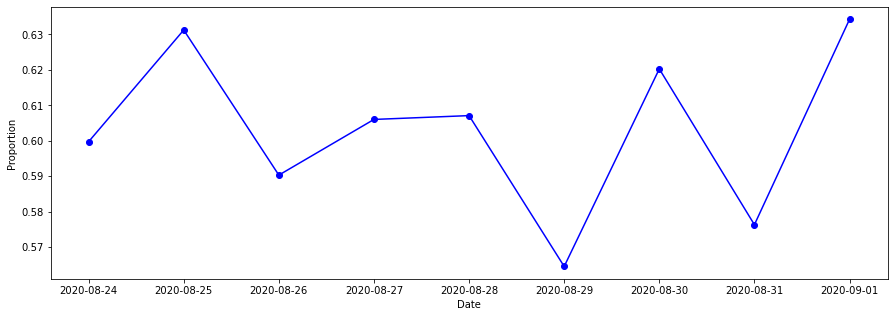

In [645]:
plt.figure(figsize = (15,5))
plt.plot(Z_8['response_id'], color = 'b', marker = 'o')
plt.xlabel('Date')
plt.ylabel('Proportion')

## Q.9) Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.

In [693]:
x_copy3 = x_copy[['response_id','Past_Vote','Vote_Now']]

In [695]:
pd.pivot_table(x_copy3, index = 'Past_Vote', columns = 'Vote_Now', dropna=True)

response_id                                                 \
Vote_Now              AAP        AIMIM          BJP          BSP     HAM   
Past_Vote                                                                  
BJP           3454.000000  5666.000000  3448.748466  4188.333333  2608.0   
BSP                   NaN  1465.000000  3261.500000  2071.000000     NaN   
Did not vote  3049.375000  3866.400000  3436.051948   362.500000  4670.0   
HAM           3177.000000          NaN  3704.240000          NaN  2775.0   
INC                   NaN  5259.666667  3851.166667          NaN     NaN   
JAP(L)                NaN          NaN  2212.000000          NaN     NaN   
JD(U)         4225.333333  4985.900000  3682.551181  5171.500000  1556.0   
LJP                   NaN          NaN  3700.671053  5105.000000     NaN   
Left Front            NaN  5920.000000  4297.500000          NaN     NaN   
NOTA                  NaN  4348.000000  3792.344828  3626.000000     NaN   
Others        1034.000000  5476.000000  3730.311111  2755.000000  5383.0   
RJD            804.666667  3733.428571  3710.913043          NaN  1411.0   
RLSP                  NaN          NaN  2832.000000          NaN     NaN   
VIP                   NaN          NaN          NaN          NaN     NaN   

                                                                               \
Vote_Now              INC       JAP(L)        JD(U)          LJP   Left Front   
Past_Vote                                                                       
BJP           3385.214286  3336.801980  3196.300000  4030.818182  3505.692308   
BSP           5302.000000          NaN          NaN          NaN          NaN   
Did not vote  3921.818182  3385.512195  2744.579710  3365.500000  3780.062500   
HAM                   NaN  4753.333333  4073.000000  2697.000000          NaN   
INC           3780.771930  4177.600000  5012.222222          NaN  5897.000000   
JAP(L)                NaN  3449.885714          NaN          NaN          NaN   
JD(U)         3451.000000  3033.388889  3167.985663  3439.275862  3680.111111   
LJP           3619.500000  2993.333333  3804.500000  3252.222222  5374.000000   
Left Front    5498.000000          NaN          NaN          NaN  3422.722222   
NOTA          5856.888889  2566.285714  4187.285714  4413.000000  3310.000000   
Others         387.000000  3134.142857  2322.500000  5062.000000  4046.250000   
RJD           3014.032258  2855.419355  3134.641026  2574.500000  4103.111111   
RLSP                  NaN  3720.333333          NaN          NaN          NaN   
VIP                   NaN          NaN    76.000000          NaN          NaN   

                                                                               \
Vote_Now             NOTA       Others      Plurals          RJD         RJJP   
Past_Vote                                                                       
BJP           3077.329897  3141.062500  3420.425287  3280.070270  3865.886364   
BSP                   NaN          NaN          NaN          NaN          NaN   
Did not vote  3109.000000  2325.636364  3708.607843  3452.471795  3911.250000   
HAM           1575.750000          NaN          NaN  4412.833333  4894.250000   
INC           4353.666667  3766.000000  1665.333333  4207.640000  2807.000000   
JAP(L)                NaN  4508.000000          NaN  3720.500000          NaN   
JD(U)         3381.011111  3105.333333  3790.000000  3716.135632  3418.230769   
LJP           5104.666667          NaN  5730.000000  4177.352941  6253.000000   
Left Front    1694.000000   582.000000          NaN  2916.250000          NaN   
NOTA          3462.000000  4500.142857  3531.727273  3729.185185  1624.200000   
Others        3896.600000  2564.666667  4071.375000  2888.761905  3261.571429   
RJD           3349.777778  2264.125000  3682.800000  3283.519112  6381.000000   
RLSP          1587.000000          NaN  2864.500000  3862.875000  3078.000000   
VIP                   NaN          NaN         

## Q.10) Repeat the above question with the cell values as the sum of “weight”.

In [701]:
x_copy4 = x_copy[['Past_Vote','Vote_Now','weight']]

In [703]:
pd.pivot_table(x_copy4, index='Past_Vote', columns='Vote_Now', values='weight', dropna=True)

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,0.686762,0.349996,0.643769,0.150850,2.034257,1.191798,0.632004,0.618451,1.039005,0.579800,0.592339,0.274692,0.574898,0.678238,0.182359,0.779796,0.665919,1.869169
BSP,NaN,1.654731,2.587244,6.402055,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,1.108237,1.075905,0.494389,1.664806,2.497170,1.263240,0.642907,0.854833,1.180181,0.815632,0.538858,0.662721,0.496461,0.891705,0.217492,1.680529,0.710176,2.139310
HAM,0.156304,NaN,1.013955,NaN,1.648856,NaN,0.237387,0.503360,1.248212,NaN,0.232246,NaN,NaN,1.285501,0.475787,NaN,0.039564,NaN
INC,NaN,1.850993,0.273813,NaN,NaN,2.837584,1.894260,1.230814,NaN,2.089575,0.999836,0.517346,0.529509,1.950200,5.340403,0.570149,1.222639,NaN
JAP(L),NaN,NaN,1.628211,NaN,NaN,NaN,1.653606,NaN,NaN,NaN,NaN,3.195682,NaN,1.082412,NaN,NaN,NaN,NaN
JD(U),2.076203,2.919861,0.615130,5.502951,1.319787,2.040139,1.475239,1.787802,1.143038,1.307289,0.678997,1.622004,1.050588,1.510702,0.308916,1.775048,1.614940,3.445881
LJP,NaN,NaN,1.118559,2.481377,NaN,5.403346,2.458649,1.897135,2.985392,0.856226,0.271057,NaN,0.963983,1.808117,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.104793,NaN,NaN,2.291368,NaN,NaN,NaN,2.460048,0.201455,8.309203,NaN,1.685070,NaN,0.877960,NaN,3.020887


## Q.11) Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.

In [726]:
df1 = x_copy.groupby('age_group')
df1

In [766]:
z11 = df1.size()
z11

age_group
18-25    2093
25-40    3844
40-55     801
55+       127
dtype: int64

In [767]:
df_1 = pd.DataFrame([z11]).transpose()
df_1

,0
age_group,
18-25,2093
25-40,3844
40-55,801
55+,127


## Q.12) Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.

In [734]:
# dataframe containing data of those who opted for JD(U) party in Vote_Now :

df2 = x_copy[x_copy['Vote_Now'] == 'JD(U)']
df2

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22.0,Male,176,BC,0.333505,18-25
13,14,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",JD(U),BJP,Somewhat Satisfied,Fully Dissatisfied,29.0,Male,184,Gen,0.275509,25-40
28,29,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,44.0,Male,205,BC,1.337935,40-55
29,30,2020-08-24,Urban,Professional Education,"₹ 1,50,000 & above",JD(U),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,26.0,Male,172,BC,0.405708,25-40
59,60,2020-08-24,Rural,12th Pass,"₹ 5,000 - ₹ 10,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,48.0,Male,171,BC,2.824391,40-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6769,6770,2020-08-31,Rural,12th Pass,"₹ 80,000 - ₹ 1,50,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,46.0,Male,166,BC,3.233006,40-55
6787,6788,2020-09-01,Rural,10th Pass,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,60.0,Male,144,SC,4.741094,55+
6829,6830,2020-09-01,Urban,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),JD(U),Fully Satisfied,Somewhat Satisfied,48.0,Male,146,EBC,6.328899,40-55
6843,6844,2020-09-01,Urban,Post - Graduation,"₹ 20,000 - ₹ 30,000",JD(U),JD(U),Fully Satisfied,Fully Satisfied,24.0,Male,241,BC,0.492241,18-25


In [752]:
# Grouping above data age-group wise
df3 = df2.groupby('age_group')
df3

In [765]:
# finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now:
z12 = df3.size()
z12

age_group
18-25    180
25-40    264
40-55     68
55+       13
dtype: int64

In [764]:
df_3 = pd.DataFrame([z12]).transpose()
df_3

,0
age_group,
18-25,180
25-40,264
40-55,68
55+,13


## Q.13) Join/Merge the two dataframes from questions 12 and 13 with the common column as age_group.

In [774]:
# Merging df1 and df3 with age_group column as common column:

df4 = pd.merge(df_1, df_3, how='outer', on = 'age_group', suffixes = ('Total_Respondents' , 'Vote_Now for JD(U)'))
df4

,0Total_Respondents,0Vote_Now for JD(U)
age_group,,
18-25,2093,180
25-40,3844,264
40-55,801,68
55+,127,13
